In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as pltimg
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import tree
import pydotplus
from sklearn.tree import DecisionTreeClassifier

In [2]:
df = pd.read_csv("identical123", index_col=[0])
df.head()

,AGYSUB,LOC,AGELVL,EDLVL,GSEGRD,LOSLVL,OCC,PATCO,PP,PPGRD,...,SALLVL_S,STEMOCC_S,SUPERVIS_S,TOA_S,WORKSCH_S,WORKSTAT_S,DATECODE_S,EMPLOYMENT_S,SALARY_S,LOS_S
0,AF1Q,40,J,4,12.0,F,1670,2,99,GS-12,...,I,XXXX,8,10,F,1,202109,1,98155.0,17.6
1,AF1Q,40,I,13,13.0,I,1361,2,99,GS-13,...,K,1361,8,10,F,1,202109,1,119787.0,32.3
2,AF1Q,40,I,10,13.0,G,2150,2,99,GS-13,...,K,XXXX,2,10,F,1,202109,1,119787.0,20.7
3,AF1Q,40,J,14,13.0,H,1372,1,99,GS-13,...,K,1372,8,10,F,1,202109,1,119787.0,26.3
4,AF1Q,40,G,10,12.0,E,343,2,99,GS-12,...,H,XXXX,8,10,F,1,202109,1,82655.0,14.8


In [3]:
df["salary_hike"] = df["SALARY_S"] >= df["SALARY"]
df

,AGYSUB,LOC,AGELVL,EDLVL,GSEGRD,LOSLVL,OCC,PATCO,PP,PPGRD,...,STEMOCC_S,SUPERVIS_S,TOA_S,WORKSCH_S,WORKSTAT_S,DATECODE_S,EMPLOYMENT_S,SALARY_S,LOS_S,salary_hike
0,AF1Q,40,J,4,12.0,F,1670,2,99,GS-12,...,XXXX,8,10,F,1,202109,1,98155.0,17.6,True
1,AF1Q,40,I,13,13.0,I,1361,2,99,GS-13,...,1361,8,10,F,1,202109,1,119787.0,32.3,True
2,AF1Q,40,I,10,13.0,G,2150,2,99,GS-13,...,XXXX,2,10,F,1,202109,1,119787.0,20.7,True
3,AF1Q,40,J,14,13.0,H,1372,1,99,GS-13,...,1372,8,10,F,1,202109,1,119787.0,26.3,True
4,AF1Q,40,G,10,12.0,E,343,2,99,GS-12,...,XXXX,8,10,F,1,202109,1,82655.0,14.8,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1275,VAKB,11,I,15,15.0,I,301,2,99,GS-15,...,XXXX,8,10,F,1,202109,1,172500.0,30.3,True
1276,VAKB,11,F,13,15.0,G,343,2,99,GS-15,...,XXXX,8,15,F,1,202109,1,148932.0,21.2,True
1277,VAKB,11,H,13,14.0,D,301,2,99,GS-14,...,XXXX,8,10,F,1,202109,1,130698.0,9.3,True
1278,VAKB,11,E,17,12.0,E,301,2,99,GS-12,...,XXXX,8,10,F,1,202109,1,103690.0,11.8,True


In [4]:
df.PPGRD = df.PPGRD.replace({'GS-4': 4, 'GS-5': 5, 'GS-6': 6, 'GS-7': 7, 'GS-8': 8, 'GS-9': 9, 'GS-10': 10, 'GS-11': 11, 'GS-12': 12, 'GS-13': 13, 'GS-14': 14, 'GS-15': 15})
df.PPGRD_S = df.PPGRD_S.replace({'GS-4': 4, 'GS-5': 5, 'GS-6': 6, 'GS-7': 7, 'GS-8': 8, 'GS-9': 9, 'GS-10': 10, 'GS-11': 11, 'GS-12': 12, 'GS-13': 13, 'GS-14': 14, 'GS-15': 15})
df.salary_hike = df.salary_hike.replace({True: 1, False: 0})
data1 = df
data1

,AGYSUB,LOC,AGELVL,EDLVL,GSEGRD,LOSLVL,OCC,PATCO,PP,PPGRD,...,STEMOCC_S,SUPERVIS_S,TOA_S,WORKSCH_S,WORKSTAT_S,DATECODE_S,EMPLOYMENT_S,SALARY_S,LOS_S,salary_hike
0,AF1Q,40,J,4,12.0,F,1670,2,99,12,...,XXXX,8,10,F,1,202109,1,98155.0,17.6,1
1,AF1Q,40,I,13,13.0,I,1361,2,99,13,...,1361,8,10,F,1,202109,1,119787.0,32.3,1
2,AF1Q,40,I,10,13.0,G,2150,2,99,13,...,XXXX,2,10,F,1,202109,1,119787.0,20.7,1
3,AF1Q,40,J,14,13.0,H,1372,1,99,13,...,1372,8,10,F,1,202109,1,119787.0,26.3,1
4,AF1Q,40,G,10,12.0,E,343,2,99,12,...,XXXX,8,10,F,1,202109,1,82655.0,14.8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1275,VAKB,11,I,15,15.0,I,301,2,99,15,...,XXXX,8,10,F,1,202109,1,172500.0,30.3,1
1276,VAKB,11,F,13,15.0,G,343,2,99,15,...,XXXX,8,15,F,1,202109,1,148932.0,21.2,1
1277,VAKB,11,H,13,14.0,D,301,2,99,14,...,XXXX,8,10,F,1,202109,1,130698.0,9.3,1
1278,VAKB,11,E,17,12.0,E,301,2,99,12,...,XXXX,8,10,F,1,202109,1,103690.0,11.8,1


In [58]:
features = ['EDLVL', 'OCC', 'PATCO', 'PPGRD', 'SUPERVIS', 'TOA', 'EDLVL_S', 'OCC_S', 'PATCO_S', 'PPGRD_S', 'SUPERVIS_S', 'TOA_S']

X = data1[features]
y = data1['salary_hike']

print(X)
print(y)

      EDLVL   OCC  PATCO PPGRD  SUPERVIS  TOA
0         4  1670      2    12         8   10
1        13  1361      2    13         8   10
2        10  2150      2    13         2   10
3        14  1372      1    13         8   10
4        10   343      2    12         8   10
...     ...   ...    ...   ...       ...  ...
1275     15   301      2    15         8   10
1276     13   343      2    15         8   15
1277     13   301      2    14         8   10
1278     17   301      2    12         8   10
1279     17   301      2    14         8   10

[1280 rows x 6 columns]
0       1
1       1
2       1
3       1
4       1
       ..
1275    1
1276    1
1277    1
1278    1
1279    1
Name: salary_hike, Length: 1280, dtype: int64


In [59]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)


In [60]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((896, 6), (384, 6))

In [61]:
# check data types in X_train

X_train.dtypes

EDLVL        int64
OCC          int64
PATCO        int64
PPGRD       object
SUPERVIS     int64
TOA          int64
dtype: object

In [62]:
import category_encoders as ce

In [64]:
# encode variables with ordinal encoding

encoder = ce.OrdinalEncoder(cols=['PPGRD', 'PPGRD_S'])
X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [65]:
X_train.head()

,EDLVL,OCC,PATCO,PPGRD,SUPERVIS,TOA
1013,13,1101,2,1,2,10
683,4,905,1,2,8,30
207,21,360,2,3,8,40
946,4,343,2,4,8,15
699,21,343,2,1,8,10


In [66]:
X_test.head()

,EDLVL,OCC,PATCO,PPGRD,SUPERVIS,TOA
133,14,346,2,8,8,10
1140,21,360,2,2,2,10
395,4,905,1,6,2,30
248,15,905,1,6,2,30
970,10,318,4,5,8,10


In [67]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [68]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 1.0


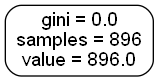

In [27]:
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = features,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

In [16]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 1.0
